# Problem Statement

This is a dummy dataset of VPN connections from 3 different countries where a user is based, to 3 selected server locations. Please note that all data contained in this file is dummy data for the purpose of the exercise - it does not reflect real circumstances in any way. 
Deliverable
Analyze the dataset to unearth insights to make 3 recommendations to Product Managers or the Development team to provide a better user experience.


## Steps to follow

1. Load the Dataset
2. Data processing and cleaning
3. Feature Engineering: creating new columns (if required)
4. EDA and Data visualization: Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data

In [29]:
#importing libraries required for analysis

import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## LOAD, PREPARE AND CLEAN DATA

we'll use the provied dataset `Data - Trial Project - Connections.csv' to load and prepare the data for analysis first

In [3]:
# Read in the data with read_csv() into a Pandas Dataframe
df = pd.read_csv('/Users/sumedhajauhari/Desktop/My Study Material/Data - Trial Project - Connections - interview_challenge_connections.csv.csv',header=0)
df.head(10)

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)
0,GB,UK - London,udp,1900-02-06,15.0,58942.0,88.0
1,FR,France - Paris - 1,udp,1900-02-06,61.0,11878.0,528.0
2,GB,UK - London,udp,1900-02-06,52.0,18254.0,322.0
3,GB,UK - London,udp,1900-02-06,21.0,93798.0,38.0
4,GB,UK - London,tcp,1900-02-06,100.0,12048.0,460.0
5,GB,UK - London,udp,1900-02-06,54.0,26268.0,195.0
6,GB,UK - London,udp,1900-02-06,85.0,15990.0,NaN
7,GB,UK - London,udp,1900-02-06,26.0,26436.0,205.0
8,FR,France - Paris - 1,udp,1900-02-06,33.0,48020.0,85.0
9,GB,UK - London,udp,1900-02-06,97.0,16836.0,NaN


In [4]:
df.columns

Index(['user_country', 'location_selected', 'protocol', 'date',
       'time_to_connect (ms)', 'download_speed (kbps)', 'latency (ms)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_country           100000 non-null  object 
 1   location_selected      100000 non-null  object 
 2   protocol               99972 non-null   object 
 3   date                   100000 non-null  object 
 4   time_to_connect (ms)   99865 non-null   float64
 5   download_speed (kbps)  99851 non-null   float64
 6   latency (ms)           77466 non-null   float64
dtypes: float64(3), object(4)
memory usage: 5.3+ MB


In [6]:
#to print unique values of object datatype
for col in df.columns:
    if df[col].dtype =='object':
        print(col,df[col].unique(),"\n")

user_country ['GB' 'FR' 'DE'] 

location_selected ['UK - London' 'France - Paris - 1' 'Germany - Nuremberg'] 

protocol ['udp' 'tcp' 'l2tp' 'sstp' nan 'pptp' 'cisco_ipsec' 'ipsec_ikev2'] 

date ['1900-02-06' '1900-02-07' '1900-02-09' '1900-02-08' '1900-02-11'
 '1900-02-10' '1900-02-12' '1900-02-13' '1900-02-14' '1900-02-15'
 '1900-02-16' '1900-02-17' '1900-02-18' '1900-02-19' '1900-02-20'] 



In [7]:
print("Date",df["date"].sort_values().unique())

Date ['1900-02-06' '1900-02-07' '1900-02-08' '1900-02-09' '1900-02-10'
 '1900-02-11' '1900-02-12' '1900-02-13' '1900-02-14' '1900-02-15'
 '1900-02-16' '1900-02-17' '1900-02-18' '1900-02-19' '1900-02-20']


In [8]:
df.isnull().sum()

user_country                 0
location_selected            0
protocol                    28
date                         0
time_to_connect (ms)       135
download_speed (kbps)      149
latency (ms)             22534
dtype: int64

In [10]:
#Checking null records in protocol

df[df['protocol'].isnull()]

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)
1384,DE,Germany - Nuremberg,NaN,1900-02-06,52.0,20572.0000,NaN
2109,DE,Germany - Nuremberg,NaN,1900-02-06,55.0,14274.0000,NaN
6002,FR,UK - London,NaN,1900-02-08,45.0,9890.4424,NaN
9258,GB,UK - London,NaN,1900-02-10,30.0,72894.8053,NaN
10638,DE,Germany - Nuremberg,NaN,1900-02-10,136.0,3545.1188,NaN
12367,DE,Germany - Nuremberg,NaN,1900-02-06,53.0,28130.0000,NaN
12525,DE,Germany - Nuremberg,NaN,1900-02-06,58.0,14734.0000,NaN
12547,GB,France - Paris - 1,NaN,1900-02-06,67.0,22400.0000,NaN
13384,FR,France - Paris - 1,NaN,1900-02-11,179.0,4221.1206,NaN
14445,DE,Germany - Nuremberg,NaN,1900-02-06,60.0,10232.0000,NaN


In [17]:
# checking most common protocol in Germany
germany_data = df[df['location_selected'] == 'Germany - Nuremberg']

# Find the mode of the 'protocol' column
protocol_mode = germany_data['protocol'].mode()[0]
protocol_mode

'udp'

In [18]:
# checking most common protocol in London
UK_data = df[df['location_selected'] == 'UK - London']

# Find the mode of the 'protocol' column
protocol_mode_UK = UK_data['protocol'].mode()[0]
protocol_mode_UK

'udp'

In [19]:
# checking most common protocol in France
FR_data = df[df['location_selected'] == 'France - Paris - 1']

# Find the mode of the 'protocol' column
protocol_mode_FR = FR_data['protocol'].mode()[0]
protocol_mode_FR

'udp'

In [15]:
#% of missing values
(df.isnull().sum() / len(df)) * 100

user_country              0.000
location_selected         0.000
protocol                  0.028
date                      0.000
time_to_connect (ms)      0.135
download_speed (kbps)     0.149
latency (ms)             22.534
dtype: float64

In [20]:
# for protocol 28 records are missing hence I will replace it with values based on the most common protocol per 'location_selected'

# But we saw above all 3 server locations has same most common protocol 'udp' hence I will replace nulls with 'udp'

df["protocol"] = df["protocol"].fillna("udp")
df.isnull().sum()

user_country                 0
location_selected            0
protocol                     0
date                         0
time_to_connect (ms)       135
download_speed (kbps)      149
latency (ms)             22534
dtype: int64

In [21]:
# for time to connect 0.135% are missing I willl replace nulls based on median values of protocol and location_selected
# because different protocols have different connection speeds and different server locations also impact connection time.

df["time_to_connect (ms)"] = df.groupby(["protocol", "location_selected"])["time_to_connect (ms)"].apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

/var/folders/gr/mb0b2h755pg3dsh__l2gg5800000gn/T/ipykernel_8451/2387446511.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["time_to_connect (ms)"] = df.groupby(["protocol", "location_selected"])["time_to_connect (ms)"].apply(lambda x: x.fillna(x.median()))


user_country                 0
location_selected            0
protocol                     0
date                         0
time_to_connect (ms)         0
download_speed (kbps)      149
latency (ms)             22534
dtype: int64

In [22]:
# for download_speed to connect 0.149% are missing I will replace nulls based on median values of protocol and location_selected
# because different protocols have different connection speeds and different server locations also impact connection time.

df["download_speed (kbps)"] = df.groupby(["protocol", "location_selected"])["download_speed (kbps)"].apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

/var/folders/gr/mb0b2h755pg3dsh__l2gg5800000gn/T/ipykernel_8451/290524908.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["download_speed (kbps)"] = df.groupby(["protocol", "location_selected"])["download_speed (kbps)"].apply(lambda x: x.fillna(x.median()))


user_country                 0
location_selected            0
protocol                     0
date                         0
time_to_connect (ms)         0
download_speed (kbps)        0
latency (ms)             22534
dtype: int64

In [31]:
# Since latency has 22.53% missing values we need to replace null values strategically. 
# We will fill missing values by protocol & location_selected

df["latency (ms)"] = df.groupby(["protocol", "location_selected"])["latency (ms)"].apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

user_country             0
location_selected        0
protocol                 0
date                     0
time_to_connect (ms)     0
download_speed (kbps)    0
latency (ms)             0
dtype: int64

In [24]:
# All nulls are removed now
df.head(5)

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)
0,GB,UK - London,udp,1900-02-06,15.0,58942.0,88.0
1,FR,France - Paris - 1,udp,1900-02-06,61.0,11878.0,528.0
2,GB,UK - London,udp,1900-02-06,52.0,18254.0,322.0
3,GB,UK - London,udp,1900-02-06,21.0,93798.0,38.0
4,GB,UK - London,tcp,1900-02-06,100.0,12048.0,460.0


In [25]:
#checkinng for duplicate records

df[df.duplicated()]

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)
494,FR,UK - London,udp,1900-02-06,0.0,0.0000,0.0
601,FR,UK - London,udp,1900-02-06,0.0,0.0000,0.0
2508,GB,UK - London,udp,1900-02-07,77.0,17273.4786,91.0
2509,FR,UK - London,tcp,1900-02-07,65.0,35520.3729,103.0
2510,FR,France - Paris - 1,udp,1900-02-07,63.0,26935.3011,169.0
...,...,...,...,...,...,...,...
99900,FR,UK - London,udp,1900-02-17,21.0,110926.8388,44.0
99901,FR,France - Paris - 1,udp,1900-02-17,163.0,6210.2848,1369.0
99902,GB,France - Paris - 1,udp,1900-02-17,102.0,10717.6614,713.0
99903,FR,France - Paris - 1,udp,1900-02-17,73.0,15479.2442,378.0


In [26]:
df.duplicated().sum()

5149

In [27]:
#5149 duplicate records exist in "entire dataset" removing them as they are redundant

df= df.drop_duplicates()

In [57]:
# checking record count asfter dropping dupiocates
df.shape

(94851, 7)

In [32]:
df.describe()
# remove outliers next

,time_to_connect (ms),download_speed (kbps),latency (ms)
count,94851.000000,94851.000000,94851.000000
mean,137.254968,44387.440575,274.051523
std,701.991227,37899.966153,4086.274022
min,0.000000,0.000000,0.000000
25%,24.000000,17170.000000,59.000000
50%,40.000000,33749.000000,102.000000
75%,77.000000,60989.000000,162.000000
max,60113.000000,372800.000000,978256.000000


In [34]:
# starting with min values

#remove record with 0's in time_to_conect , download_speed, latency fields as it is not correct to have 0's in it

zero_value_records = df[(df["time_to_connect (ms)"] == 0) | (df["download_speed (kbps)"] == 0) | (df["latency (ms)"] == 0)]
zero_value_records

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)
84,FR,UK - London,udp,1900-02-06,0,0,0
114,GB,UK - London,udp,1900-02-06,0,0,0
1840,GB,UK - London,l2tp,1900-02-06,0,0,0
1857,GB,France - Paris - 1,udp,1900-02-06,0,23816,179
3297,FR,France - Paris - 1,udp,1900-02-07,0,0,0
...,...,...,...,...,...,...,...
91960,FR,France - Paris - 1,udp,1900-02-09,0,0,0
94070,GB,France - Paris - 1,udp,1900-02-14,0,45373,117
94194,GB,UK - London,tcp,1900-02-14,0,0,0
95897,FR,UK - London,udp,1900-02-15,0,0,0


In [40]:
# Calculate the 1st percentile (P1) for numerical columns
p1_values = df[["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]].quantile(0.01)
p1_values

time_to_connect (ms)        8.0
download_speed (kbps)    1284.5
latency (ms)               22.0
Name: 0.01, dtype: float64

In [ ]:
#means 1% of connections take 8ms or less to connect
#1% of connections have a speed of 1284.5 kbps (1.28 Mbps) or lower.
#1% of connections have a latency of 22ms or lower.

In [46]:
# Replacing 0 values with the 1st percentile value for each column
df["time_to_connect (ms)"] = df["time_to_connect (ms)"].replace(0, p1_values["time_to_connect (ms)"])
df["download_speed (kbps)"] = df["download_speed (kbps)"].replace(0, p1_values["download_speed (kbps)"])
df["latency (ms)"] = df["latency (ms)"].replace(0, p1_values["latency (ms)"])

In [48]:
zero_value_records_new = df[(df["time_to_connect (ms)"] == 0) | (df["download_speed (kbps)"] == 0) | (df["latency (ms)"] == 0)]
zero_value_records_new

#no record having 0 value

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms)


In [49]:
sorted(df['time_to_connect (ms)'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [51]:
#checking for most extreme value (max value)

p99_values = df[["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]].quantile(0.99)
p99_values

time_to_connect (ms)       2287.0
download_speed (kbps)    179971.5
latency (ms)               2694.5
Name: 0.99, dtype: float64

In [ ]:
#time_to_connect (ms) = 2287.0 → 99% of connections take ≤ 2287 ms, meaning any value above this is an extreme outlier.
#download_speed (kbps) = 179971.5 → 99% of connections have speeds ≤ 179971.5 kbps (~180 Mbps).
#latency (ms) = 2694.5 → 99% of connections have latency ≤ 2694.5 ms, meaning higher values are anomalies.


In [52]:
# Replace only the max values with the 99th percentile
df["time_to_connect (ms)"] = df["time_to_connect (ms)"].replace(df["time_to_connect (ms)"].max(), p99_values["time_to_connect (ms)"])
df["download_speed (kbps)"] = df["download_speed (kbps)"].replace(df["download_speed (kbps)"].max(), p99_values["download_speed (kbps)"])
df["latency (ms)"] = df["latency (ms)"].replace(df["latency (ms)"].max(), p99_values["latency (ms)"])

In [53]:
df.describe()

,time_to_connect (ms),download_speed (kbps),latency (ms)
count,94851.000000,94851.000000,94851.000000
mean,136.651980,44386.328489,263.782791
std,674.473336,37886.456247,2571.727100
min,1.000000,9.000000,1.000000
25%,24.000000,17170.000000,59.000000
50%,40.000000,33749.000000,102.000000
75%,77.000000,60989.000000,162.000000
max,58817.000000,341598.000000,391519.000000


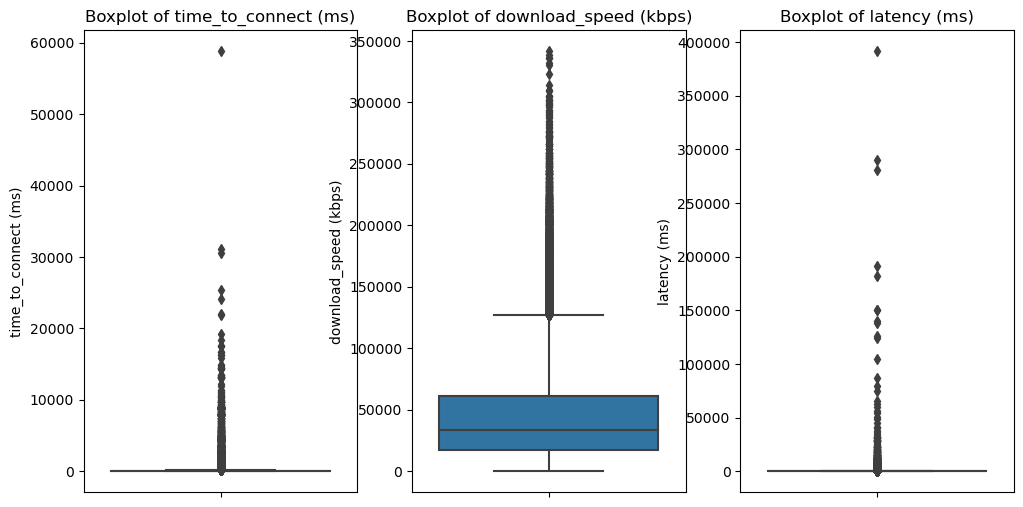

In [54]:
# checking for existing outliers using box plot

num_cols = ["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")


In [61]:
# checking count of outliers

outliers_iqr = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]
print(outliers_iqr)

{'time_to_connect (ms)': 9897, 'download_speed (kbps)': 3873, 'latency (ms)': 10998}


In [63]:
# checking % outlier
outlier_percentage_iqr = {}
total_rows = len(df)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage_iqr[col] = (len(outliers) / total_rows) * 100
print(outlier_percentage_iqr)


{'time_to_connect (ms)': 10.434260049973116, 'download_speed (kbps)': 4.083246354809122, 'latency (ms)': 11.59502799127052}


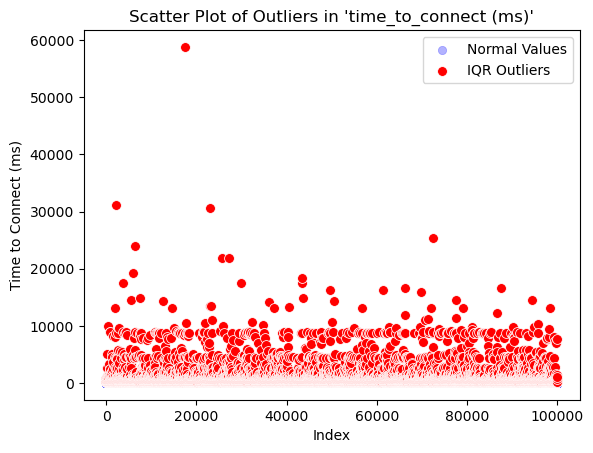

In [67]:
col = "time_to_connect (ms)"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["outlier_iqr"] = (df[col] < lower_bound) | (df[col] > upper_bound)

#plotting
sns.scatterplot(x=df.index, y=df[col], label="Normal Values", color="blue", alpha=0.3, 
    marker="o", 
    edgecolor=None)
# Plot IQR outliers in red
sns.scatterplot(x=df[df["outlier_iqr"]].index, y=df[df["outlier_iqr"]][col], label="IQR Outliers", color="red", 
    marker="o", 
    s=50)
plt.title("Scatter Plot of Outliers in 'time_to_connect (ms)'")
plt.xlabel("Index")
plt.ylabel("Time to Connect (ms)")
plt.legend()
plt.show()

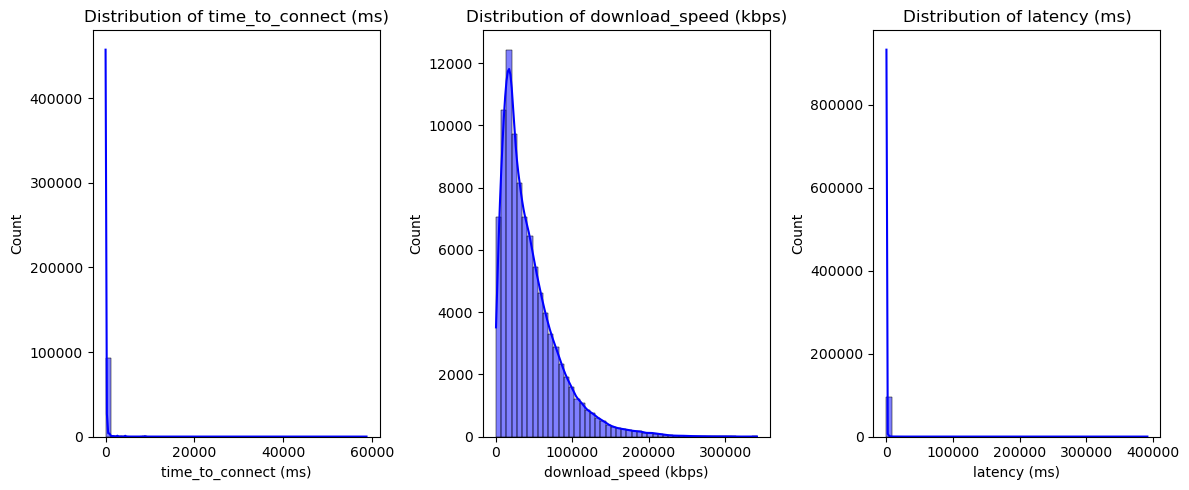

In [68]:
#checking if data is skewed or normally distributed to decide method to replace outlier

num_cols = ["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=50, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [69]:
#definitely data is skewed so lets replace extreme outliers with 1st and 99th percentile

# Replace high outliers with 99th percentile
df["time_to_connect (ms)"] = df["time_to_connect (ms)"].clip(upper=df["time_to_connect (ms)"].quantile(0.99))
df["download_speed (kbps)"] = df["download_speed (kbps)"].clip(upper=df["download_speed (kbps)"].quantile(0.99))
df["latency (ms)"] = df["latency (ms)"].clip(upper=df["latency (ms)"].quantile(0.99))

# Replace low outliers with 1st percentile
df["time_to_connect (ms)"] = df["time_to_connect (ms)"].clip(lower=df["time_to_connect (ms)"].quantile(0.01))
df["download_speed (kbps)"] = df["download_speed (kbps)"].clip(lower=df["download_speed (kbps)"].quantile(0.01))
df["latency (ms)"] = df["latency (ms)"].clip(lower=df["latency (ms)"].quantile(0.01))

# Verify new min and max values after replacement
print(df[["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]].describe())

       time_to_connect (ms)  download_speed (kbps)  latency (ms)
count          94851.000000           94851.000000  94851.000000
mean             104.850118           44091.937344    196.338481
std              273.911448           36563.882330    359.012439
min                8.000000            1284.750000     22.000000
25%               24.000000           17170.000000     59.000000
50%               40.000000           33749.000000    102.000000
75%               77.000000           60989.000000    162.000000
max             2286.500000          179971.250000   2693.250000


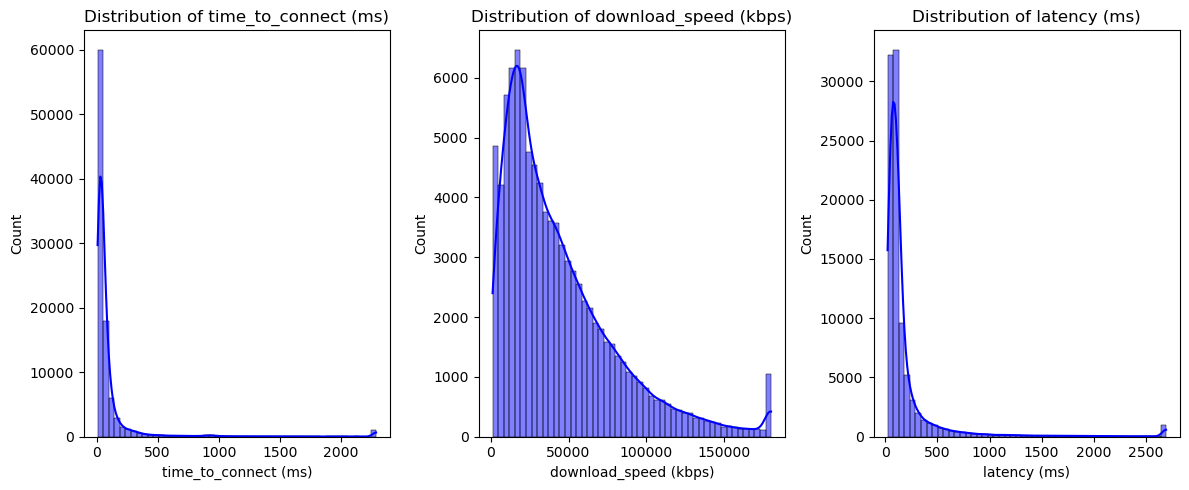

In [71]:
# checking for still existing outliers using box plot

num_cols = ["time_to_connect (ms)", "download_speed (kbps)", "latency (ms)"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=50, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [72]:
# converting numerical columns back to integer format as in csv file
df["time_to_connect (ms)"] = df["time_to_connect (ms)"].astype(int)
#df["download_speed (kbps)"] = df["download_speed (kbps)"].astype(int)
df["latency (ms)"] = df["latency (ms)"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94851 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_country           94851 non-null  object 
 1   location_selected      94851 non-null  object 
 2   protocol               94851 non-null  object 
 3   date                   94851 non-null  object 
 4   time_to_connect (ms)   94851 non-null  int64  
 5   download_speed (kbps)  94851 non-null  float64
 6   latency (ms)           94851 non-null  int64  
 7   outlier_iqr            94851 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.9+ MB


In [73]:
df.describe()

,time_to_connect (ms),download_speed (kbps),latency (ms)
count,94851.000000,94851.000000,94851.000000
mean,104.845115,44091.937344,196.335980
std,273.871604,36563.882330,358.995043
min,8.000000,1284.750000,22.000000
25%,24.000000,17170.000000,59.000000
50%,40.000000,33749.000000,102.000000
75%,77.000000,60989.000000,162.000000
max,2286.000000,179971.250000,2693.000000


## Feature Engineering for PMs and Developers

In [75]:
df["connection_reliability"] = pd.cut(df["time_to_connect (ms)"], bins=[0, 25, 75, 200, 500, np.inf], 
                                      labels=["Instant", "Good", "Moderate", "Slow", "Very Slow"])
df["speed_category"] = pd.cut(df["download_speed (kbps)"], bins=[0, 10000, 30000, 60000, 100000, np.inf], 
                              labels=["Very Slow", "Slow", "Moderate", "Fast", "Very Fast"])
df["frustration_score"] = df["latency (ms)"] / df["download_speed (kbps)"]

In [ ]:
#another way to do it

df["connection_reliability"] = np.select(
    [df["time_to_connect (ms)"] <= 25, df["time_to_connect (ms)"] <= 75, 
    df["time_to_connect (ms)"] <= 200, 
    df["time_to_connect (ms)"] <= 500],
    ["Instant", "Good", "Moderate", "Slow"],
    default="Very Slow"
)

In [76]:
#For Developers
df["connection_efficiency"] = df["download_speed (kbps)"] / df["latency (ms)"] #reverse of frustration_score

df["server_load_risk"] = df.groupby("location_selected")["latency (ms)"].transform(lambda x: "High" if x.mean() > 197 else "Low")

#considering 3 most popular protocols
df["recommended_protocol"] = df.apply(lambda x: 
                                      "UDP" if x["latency (ms)"] < 59 and x["download_speed (kbps)"] > 60989 
                                      else "TCP" if 59 <= x["latency (ms)"] <= 162 and 17170 <= x["download_speed (kbps)"] <= 60989 
                                      else "L2TP", axis=1)

# Check the distribution of recommended top 3 protocols comprising 99.6% in total
print(df["recommended_protocol"].value_counts(normalize=True) * 100)


L2TP    52.892431
TCP     31.257446
UDP     15.850123
Name: recommended_protocol, dtype: float64


In [78]:
#current protocol count

df["protocol"].value_counts(normalize=True) * 100

udp            88.384941
tcp             9.627732
l2tp            1.746950
sstp            0.203477
pptp            0.018977
cisco_ipsec     0.010543
ipsec_ikev2     0.007380
Name: protocol, dtype: float64

In [238]:
# Filter dataset for "Slow" and "Very Slow" speed_category
slow_df = df[df['speed_category'].isin(["Slow & Very Slow"])]

# Count occurrences of each protocol
protocol_counts = slow_df['protocol'].value_counts()

# Calculate percentage distribution
protocol_percentage = (protocol_counts / protocol_counts.sum()) * 100

# Display results
print(protocol_percentage)

udp            86.835196
tcp            11.373406
l2tp            1.563698
sstp            0.176584
pptp            0.027882
ipsec_ikev2     0.016264
cisco_ipsec     0.006970
Name: protocol, dtype: float64


In [237]:
df.head(10)

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms),connection_reliability,speed_category,frustration_score,connection_efficiency,server_load_risk,recommended_protocol,frustration_category,connection_reliability_score
0,GB,UK - London,udp,1900-02-06,15,58942.0,88,Instant,Moderate,0.001493,669.795455,Low,TCP,Low,5.0
83433,FR,France - Paris - 1,udp,1900-02-06,27,57102.0,73,Good,Moderate,0.001278,782.219178,High,TCP,Low,4.0
83434,GB,UK - London,udp,1900-02-06,23,81048.0,42,Instant,Fast,0.000518,1929.714286,Low,UDP,Low,5.0
83435,GB,UK - London,udp,1900-02-06,99,13006.0,91,Moderate,Slow & Very Slow,0.006997,142.923077,Low,L2TP,Moderate,3.0
83436,GB,UK - London,udp,1900-02-06,15,39054.0,55,Instant,Moderate,0.001408,710.072727,Low,L2TP,Low,5.0
83437,DE,Germany - Nuremberg,udp,1900-02-06,25,56960.0,65,Instant,Moderate,0.001141,876.307692,Low,TCP,Low,5.0
83438,FR,France - Paris - 1,udp,1900-02-06,367,2200.0,122,Slow & Very Slow,Slow & Very Slow,0.055455,18.032787,High,L2TP,High,NaN
83439,GB,UK - London,udp,1900-02-06,131,9760.0,222,Moderate,Slow & Very Slow,0.022746,43.963964,Low,L2TP,High,3.0
83440,FR,France - Paris - 1,udp,1900-02-06,26,49226.0,94,Good,Moderate,0.001910,523.680851,High,TCP,Low,4.0
83441,FR,UK - London,udp,1900-02-06,28,48722.0,94,Good,Moderate,0.001929,518.319149,Low,TCP,Low,4.0


In [79]:
df.head(10)

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms),outlier_iqr,connection_reliability,speed_category,frustration_score,connection_efficiency,server_load_risk,recommended_protocol
0,GB,UK - London,udp,1900-02-06,15,58942.0,88,False,Instant,Moderate,0.001493,669.795455,Low,TCP
1,FR,France - Paris - 1,udp,1900-02-06,61,11878.0,528,False,Good,Slow,0.044452,22.496212,High,L2TP
2,GB,UK - London,udp,1900-02-06,52,18254.0,322,False,Good,Slow,0.017640,56.689441,Low,L2TP
3,GB,UK - London,udp,1900-02-06,21,93798.0,38,False,Instant,Fast,0.000405,2468.368421,Low,UDP
4,GB,UK - London,tcp,1900-02-06,100,12048.0,460,False,Moderate,Slow,0.038181,26.191304,Low,L2TP
5,GB,UK - London,udp,1900-02-06,54,26268.0,195,False,Good,Slow,0.007423,134.707692,Low,L2TP
6,GB,UK - London,udp,1900-02-06,85,15990.0,91,False,Moderate,Slow,0.005691,175.714286,Low,L2TP
7,GB,UK - London,udp,1900-02-06,26,26436.0,205,False,Good,Slow,0.007755,128.956098,Low,L2TP
8,FR,France - Paris - 1,udp,1900-02-06,33,48020.0,85,False,Good,Moderate,0.001770,564.941176,High,TCP
9,GB,UK - London,udp,1900-02-06,97,16836.0,91,False,Moderate,Slow,0.005405,185.010989,Low,L2TP


In [80]:
df.describe()

,time_to_connect (ms),download_speed (kbps),latency (ms),frustration_score,connection_efficiency
count,94851.000000,94851.000000,94851.000000,94851.000000,94851.000000
mean,104.845115,44091.937344,196.335980,0.033528,783.312721
std,273.871604,36563.882330,358.995043,0.175503,1274.886717
min,8.000000,1284.750000,22.000000,0.000122,0.477070
25%,24.000000,17170.000000,59.000000,0.001177,110.598361
50%,40.000000,33749.000000,102.000000,0.003280,304.865385
75%,77.000000,60989.000000,162.000000,0.009042,849.376131
max,2286.000000,179971.250000,2693.000000,2.096128,8180.511364


In [81]:
#let's create frustration bins for better analysis
frustration_bins = [0, 0.00012, 0.0032, 0.0090, 0.1755, np.inf]
frustration_labels = ["Very Low (Excellent UX)", "Low (Good UX)", "Moderate (Acceptable UX)", "High (Frustrating UX)", "Very High (Unusable UX)"]

df["frustration_category"] = pd.cut(df["frustration_score"], bins=frustration_bins, labels=frustration_labels)
print(df["frustration_category"].value_counts(normalize=True) * 100)

#score above 0.009 is high frustration which is above median

Low (Good UX)               49.366902
Moderate (Acceptable UX)    25.537949
High (Frustrating UX)       22.148422
Very High (Unusable UX)      2.946727
Very Low (Excellent UX)      0.000000
Name: frustration_category, dtype: float64


In [82]:
df=df.drop(columns=['outlier_iqr'])
df.head(10)

,user_country,location_selected,protocol,date,time_to_connect (ms),download_speed (kbps),latency (ms),connection_reliability,speed_category,frustration_score,connection_efficiency,server_load_risk,recommended_protocol,frustration_category
0,GB,UK - London,udp,1900-02-06,15,58942.0,88,Instant,Moderate,0.001493,669.795455,Low,TCP,Low (Good UX)
1,FR,France - Paris - 1,udp,1900-02-06,61,11878.0,528,Good,Slow,0.044452,22.496212,High,L2TP,High (Frustrating UX)
2,GB,UK - London,udp,1900-02-06,52,18254.0,322,Good,Slow,0.017640,56.689441,Low,L2TP,High (Frustrating UX)
3,GB,UK - London,udp,1900-02-06,21,93798.0,38,Instant,Fast,0.000405,2468.368421,Low,UDP,Low (Good UX)
4,GB,UK - London,tcp,1900-02-06,100,12048.0,460,Moderate,Slow,0.038181,26.191304,Low,L2TP,High (Frustrating UX)
5,GB,UK - London,udp,1900-02-06,54,26268.0,195,Good,Slow,0.007423,134.707692,Low,L2TP,Moderate (Acceptable UX)
6,GB,UK - London,udp,1900-02-06,85,15990.0,91,Moderate,Slow,0.005691,175.714286,Low,L2TP,Moderate (Acceptable UX)
7,GB,UK - London,udp,1900-02-06,26,26436.0,205,Good,Slow,0.007755,128.956098,Low,L2TP,Moderate (Acceptable UX)
8,FR,France - Paris - 1,udp,1900-02-06,33,48020.0,85,Good,Moderate,0.001770,564.941176,High,TCP,Low (Good UX)
9,GB,UK - London,udp,1900-02-06,97,16836.0,91,Moderate,Slow,0.005405,185.010989,Low,L2TP,Moderate (Acceptable UX)


In [196]:
df['frustration_category'] = df['frustration_category'].replace({"Low (Good UX)": "Low", "High (Frustrating UX)": "High", "Moderate (Acceptable UX)" : "Moderate", "Very High (Unusable UX)" : "Very High", "Very Low (Excellent UX)" : "Very Low"})

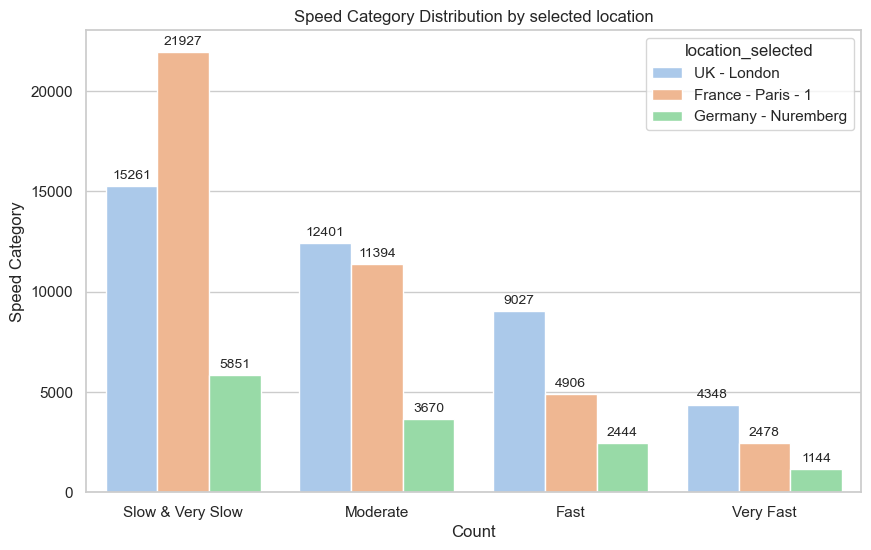

In [223]:
# visualization

# Set plot style
#sns.set(style="whitegrid")

# ------- Count of Speed Category for Each Country ------- #
plt.figure(figsize=(10, 6))
ax=sns.countplot(x=df['speed_category'], hue=df['location_selected'], palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add labels and title
plt.title("Speed Category Distribution by selected location")
plt.xlabel("Count")
plt.ylabel("Speed Category")
plt.legend(title="location_selected")

# Show plot
plt.show()

# very slow download speed on  France- Paris -1  suggesting  server congestion or poor routing.
#Recommendat - Increase Bandwidth or Add More Servers in France to handle higher loads.
# Also, Prioritize High-Speed Users (e.g., Streamers & Gamers) with QoS (Quality of Service) settings.

In [174]:
# Count total unique users
total_users = df['user_country'].count()

# Filter users who experience "Slow" or "Very Slow" speed
#slow_speed_users = df[df['speed_category'].isin(["Slow", "Very Slow"])]['user_country'].count()
# Filter users who experience "Slow" or "Very Slow" speed
#slow_speed_users = # Count the number of users experiencing "Slow" or "Very Slow" speed
slow_speed_users = df[df["speed_category"].isin(["Slow & Very Slow"])].shape[0]


# Calculate percentage
percentage_slow_users = (slow_speed_users / total_users) * 100

# Print the result
print(f"Percentage of users experiencing Slow or Very Slow speed: {percentage_slow_users:.2f}%")


Percentage of users experiencing Slow or Very Slow speed: 45.38%


In [226]:

total_counts = df.groupby('location_selected').size().reset_index(name='total_count')

# Count occurrences where speed_category is "Slow" or "Very Slow"
slow_counts = df[df['speed_category'].isin(["Slow & Very Slow"])].groupby('location_selected').size().reset_index(name='slow_count')

# Merge both counts
merged_df = total_counts.merge(slow_counts, on='location_selected', how='left').fillna(0)

# Calculate percentage
merged_df['slow_speed_percentage'] = (merged_df['slow_count'] / merged_df['total_count']) * 100

# Sort results by highest slow speed percentage
merged_df = merged_df.sort_values(by='slow_speed_percentage', ascending=False)
merged_df

,location_selected,total_count,slow_count,slow_speed_percentage
0,France - Paris - 1,40705,21927,53.868075
1,Germany - Nuremberg,13109,5851,44.633458
2,UK - London,41037,15261,37.188391


In [173]:
#slow_speed_users = df[df["speed_category"].isin(["Moderate"])]
slow_speed_users=df["speed_category"].value_counts()
slow_speed_users

Slow & Very Slow    43039
Moderate            27465
Fast                16377
Very Fast            7970
Name: speed_category, dtype: int64

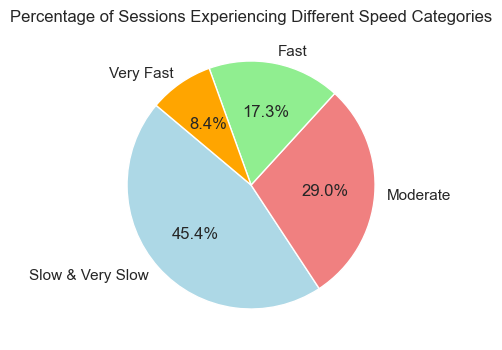

In [143]:
# Count number of users in each speed category
speed_distribution = df['speed_category'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(4, 6))
plt.pie(speed_distribution, labels=speed_distribution.index, autopct='%1.1f%%', colors=["lightblue", "lightcoral", "lightgreen", "orange", "purple"], startangle=140)

# Add title
plt.title("Percentage of Sessions Experiencing Different Speed Categories")

# Show the pie chart
plt.show()

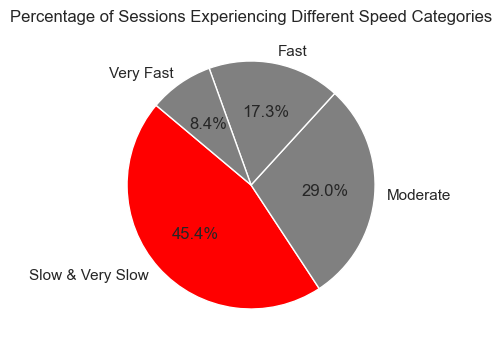

In [144]:
# Combine "Slow" and "Very Slow" into a single category
df['speed_category'] = df['speed_category'].replace({"Slow": "Slow & Very Slow", "Very Slow": "Slow & Very Slow"})

# Count number of users in each updated speed category
speed_distribution = df['speed_category'].value_counts()

# Define colors: Red for "Slow & Very Slow", Grey for others
colors = ["red" if category == "Slow & Very Slow" else "grey" for category in speed_distribution.index]

# Plot Pie Chart
plt.figure(figsize=(4, 6))
plt.pie(speed_distribution, labels=speed_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title("Percentage of Sessions Experiencing Different Speed Categories")

# Show the pie chart
plt.show()



In [ ]:
df['speed_category'] = df['speed_category'].replace({"Slow & Very Slow", "Very Slow": "Slow & Very Slow"})

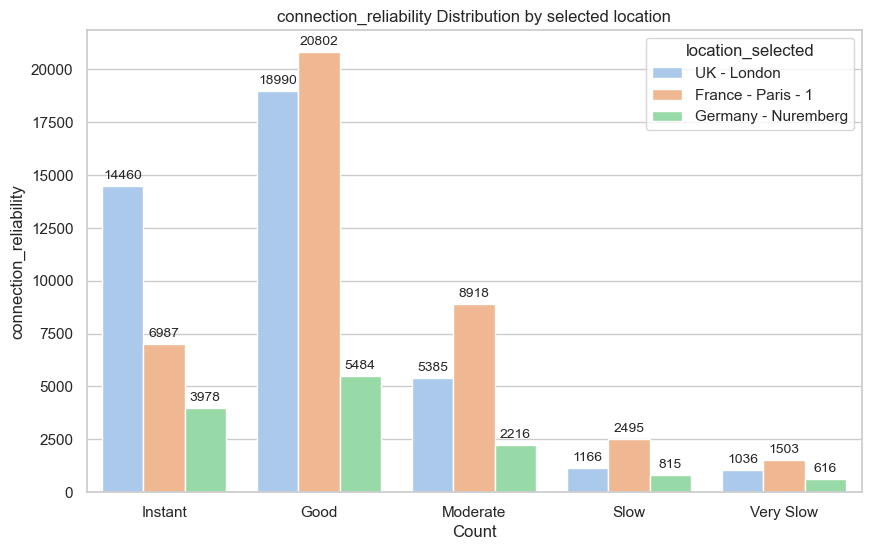

In [96]:
# visualization

# Set plot style
sns.set(style="whitegrid")

# ------- Count of Speed Category for Each Country ------- #
plt.figure(figsize=(10, 6))
ax=sns.countplot(x=df['connection_reliability'], hue=df['location_selected'], palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add labels and title
plt.title("connection_reliability Distribution by selected location")
plt.xlabel("Count")
plt.ylabel("connection_reliability")
plt.legend(title="location_selected")

# Show plot
plt.show()

# connection is not reliable in 

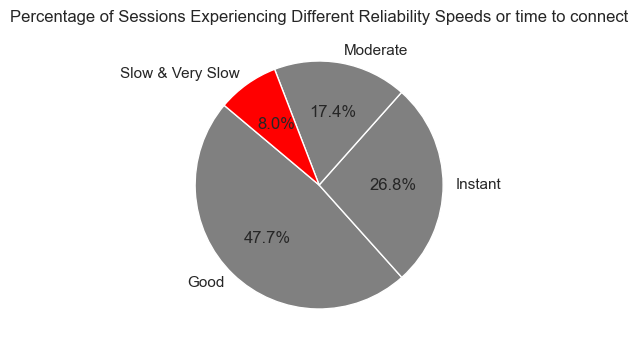

In [146]:
# check for slow and very slow connection

# Combine "Slow" and "Very Slow" into a single category
df['connection_reliability'] = df['connection_reliability'].replace({"Slow": "Slow & Very Slow", "Very Slow": "Slow & Very Slow"})

# Count number of users in each updated speed category
reliability_distribution = df['connection_reliability'].value_counts()

# Define colors: Red for "Slow & Very Slow", Grey for others
colors = ["red" if category == "Slow & Very Slow" else "grey" for category in reliability_distribution.index]

# Plot Pie Chart
plt.figure(figsize=(4, 6))
plt.pie(reliability_distribution, labels=reliability_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title("Percentage of Sessions Experiencing Different Reliability Speeds or time to connect")

# Show the pie chart
plt.show()

# 8% of sessions experience slow connection time means For every 100 VPN sessions, 8 sessions experience disruptions, leading to frustration, app restarts, and uninstalls.”

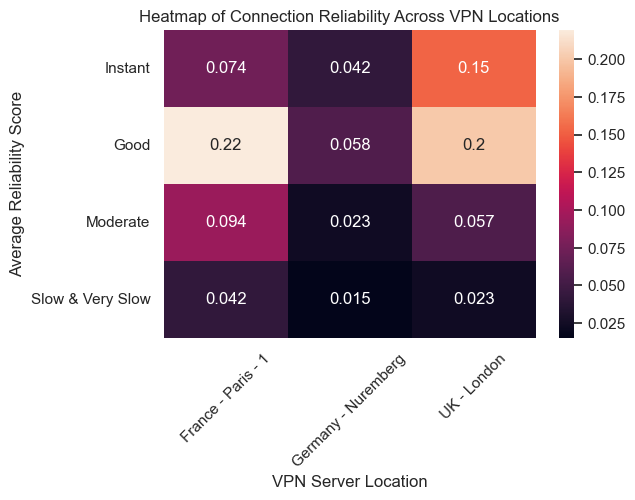

In [214]:
# Plot the Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df['connection_reliability'], df['location_selected'],normalize = True),annot = True)
#sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Connection Reliability Across VPN Locations")
plt.xlabel("VPN Server Location")
plt.ylabel("Average Reliability Score")
plt.xticks(rotation=45)
plt.show()


In [216]:
filtered_df = df[df['connection_reliability'].isin(["Slow & Very Slow"])]

# Count occurrences of each (user_country, location_selected) combination
country_location_counts = filtered_df.groupby(['user_country', 'location_selected']).size().reset_index(name='count')

# Sort results from high to low
sorted_counts = country_location_counts.sort_values(by='count', ascending=False)

# Display the result
print(sorted_counts)

  user_country    location_selected  count
3           FR   France - Paris - 1   3388
8           GB          UK - London   1522
1           DE  Germany - Nuremberg   1355
5           FR          UK - London    642
6           GB   France - Paris - 1    577
4           FR  Germany - Nuremberg     58
2           DE          UK - London     38
0           DE   France - Paris - 1     33
7           GB  Germany - Nuremberg     18


In [222]:
temp_df = df.copy()

temp_df['user_country'] = temp_df['user_country'].replace({
    'FR': 'France - Paris - 1',
    'GB': 'UK - London',
    'DE': 'Germany - Nuremberg'
})
print(temp_df.head(10))

mismatched_df = temp_df[temp_df['user_country'] != temp_df['location_selected']]
total_records = len(temp_df)
mismatched_records = len(mismatched_df)

# Calculate percentage
percentage_mismatched = (mismatched_records / total_records) * 100
percentage_mismatched

         user_country   location_selected protocol        date  \
0         UK - London         UK - London      udp  1900-02-06   
1  France - Paris - 1  France - Paris - 1      udp  1900-02-06   
2         UK - London         UK - London      udp  1900-02-06   
3         UK - London         UK - London      udp  1900-02-06   
4         UK - London         UK - London      tcp  1900-02-06   
5         UK - London         UK - London      udp  1900-02-06   
6         UK - London         UK - London      udp  1900-02-06   
7         UK - London         UK - London      udp  1900-02-06   
8  France - Paris - 1  France - Paris - 1      udp  1900-02-06   
9         UK - London         UK - London      udp  1900-02-06   

   time_to_connect (ms)  download_speed (kbps)  latency (ms)  \
0                    15                58942.0            88   
1                    61                11878.0           528   
2                    52                18254.0           322   
3                

19.450506584010714

In [240]:

total_counts = df.groupby('location_selected').size().reset_index(name='total_count')

# Count occurrences where speed_category is "Slow" or "Very Slow"
reliable_counts = df[df['connection_reliability'].isin(["Slow & Very Slow"])].groupby('location_selected').size().reset_index(name='reliable_count')

# Merge both counts
merged_df = total_counts.merge(reliable_counts, on='location_selected', how='left').fillna(0)

# Calculate percentage
merged_df['reliable_percentage'] = (merged_df['reliable_count'] / merged_df['total_count']) * 100

# Sort results by highest slow speed percentage
merged_df = merged_df.sort_values(by='reliable_percentage', ascending=False)
merged_df


,location_selected,total_count,reliable_count,reliable_percentage
1,Germany - Nuremberg,13109,1431,10.916164
0,France - Paris - 1,40705,3998,9.821889
2,UK - London,41037,2202,5.365889


      user_country   location_selected protocol        date  \
1               FR  France - Paris - 1      udp  1900-02-06   
8               FR  France - Paris - 1      udp  1900-02-06   
11              FR  France - Paris - 1      udp  1900-02-06   
13              GB  France - Paris - 1      udp  1900-02-06   
15              GB  France - Paris - 1      udp  1900-02-06   
...            ...                 ...      ...         ...   
99992           FR  France - Paris - 1      udp  1900-02-17   
99993           FR  France - Paris - 1      udp  1900-02-17   
99994           GB  France - Paris - 1      udp  1900-02-17   
99996           FR  France - Paris - 1      udp  1900-02-17   
99998           FR  France - Paris - 1     l2tp  1900-02-17   

       time_to_connect (ms)  download_speed (kbps)  latency (ms)  \
1                        61                11878.0           528   
8                        33                48020.0            85   
11                       23            

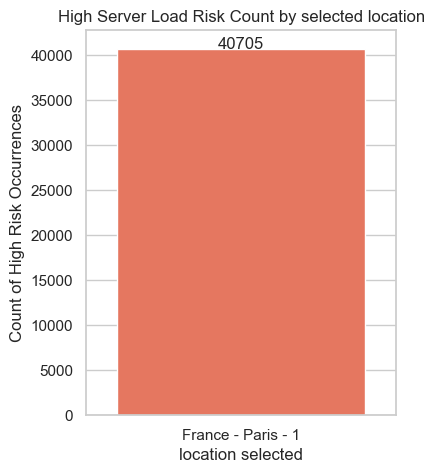

In [231]:
# Filter only "High" server load risk values
high_risk_df = df[df['server_load_risk'] == "High"]
print(high_risk_df)

# Count occurrences per country
high_risk_counts = high_risk_df['location_selected'].value_counts()
print(high_risk_counts)
colors = sns.color_palette("Reds", len(high_risk_counts))

# Plot the data
plt.figure(figsize=(4, 5))
sns.barplot(x=high_risk_counts.index, y=high_risk_counts.values, palette=colors)

# Add labels and title
plt.title("High Server Load Risk Count by selected location")
plt.xlabel("location selected")
plt.ylabel("Count of High Risk Occurrences")

for i, v in enumerate(high_risk_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)
# Show plot
plt.show()

#Server load risk is "High" only in France. Overloaded servers cause slow speeds, high latency,
# Recommen - Suggest less crowded servers to users. Implement smart/auto switching if a server is congested.

In [234]:

# Filter for server_load_risk = "High"
high_risk_df = df[df['server_load_risk'] == "Low"]

# Count occurrences of each location
high_risk_counts = high_risk_df['location_selected'].value_counts().reset_index()
high_risk_counts.columns = ['location_selected', 'count']
high_risk_counts


,location_selected,count
0,UK - London,41037
1,Germany - Nuremberg,13109


In [112]:
# for protoocol we can recommend users with Medium Latency (59-162 ms) & Moderate Speed (17,170-60,989 kbps) to switch to TCP
# High and very high Latency (> Q3: 162 ms) & Low Speed (< Q1: 17,170 kbps) to switch to L2TP
# Low latency (< Q1: 59 ms) & High Speed (> Q3: 60,989 kbps) to udp

# currently 88.3% values have default protocol as UDP 

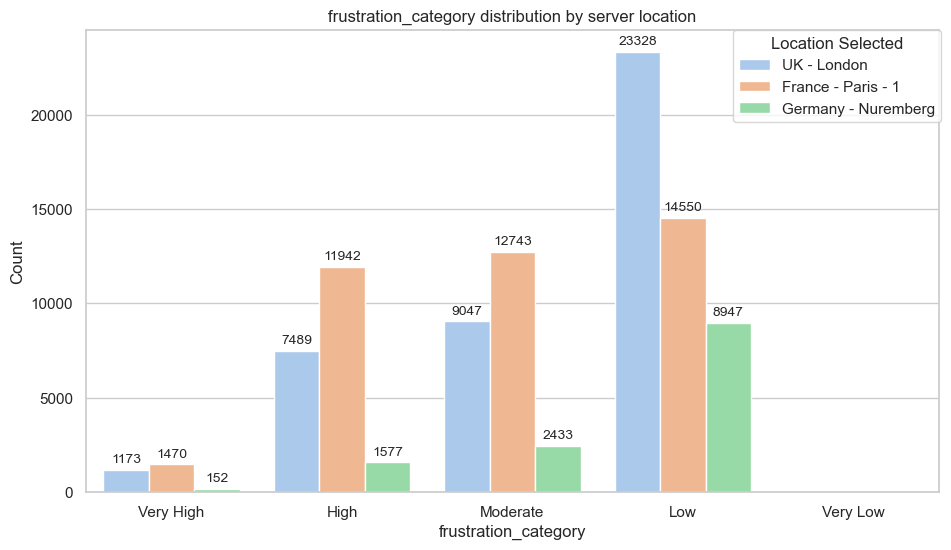

In [209]:
# visualization

# Set plot style
#sns.set(style="whitegrid")

# Define the custom order for frustration categories
frustration_order = ["Very High", "High", "Moderate", "Low", "Very Low"]

# ------- Count of Speed Category for Each Country ------- #
plt.figure(figsize=(11, 6))
ax=sns.countplot(x=df['frustration_category'], hue=df['location_selected'], palette="pastel", order=frustration_order)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add labels and title
plt.title("frustration_category distribution by server location")
plt.ylabel("Count")
plt.xlabel("frustration_category")
plt.legend(title="location_selected")
plt.legend(title="Location Selected", loc="center left", bbox_to_anchor=(0.75, 0.9))

# Show plot
plt.show()

# France - paris has high latency and frustrating/unstable UX
# Recommendation for Developers:

#Introduce Smart Server Selection: Automatically route users to the lowest-latency server.
#Optimize Server Load Balancing: Reduce congestion on overloaded servers.
#Implement Latency-Based Recommendations: Show users real-time latency and suggest alternative servers.


In [139]:
# find % of times UX is frustrating make pie chart

# Filter for "High" and "Very High" frustration categories
filtered_df = df[df['frustration_category'].isin(["High (Frustrating UX)", "Very High (Unusable UX)"])]

# Calculate average latency for each frustration category
avg_latency = filtered_df.groupby('frustration_category')['latency (ms)'].mean().reset_index()

# Display the result
print(avg_latency)

       frustration_category  latency (ms)
0   Very Low (Excellent UX)           NaN
1             Low (Good UX)           NaN
2  Moderate (Acceptable UX)           NaN
3     High (Frustrating UX)    320.678408
4   Very High (Unusable UX)   1943.473345


In [145]:

total_users = df['user_country'].count() 

# Filter users facing "High" or "Very High" frustration
frustrated_users = df[df['frustration_category'].isin(["High (Frustrating UX)", "Very High (Unusable UX)"])]['user_country'].count()

# Calculate percentage
percentage_frustrated_users = (frustrated_users / total_users) * 100

# Print the result
print(f"Percentage of Sessions experiencing High or Very High frustration: {percentage_frustrated_users:.2f}%")

#Users with a frustration score > 0.009 account for 25% of VPN sessions, meaning 1 in 2.5 users is experiencing a frustrating VPN experience. We need to fix this.”

Percentage of Sessions experiencing High or Very High frustration: 25.10%


In [229]:

total_counts = df.groupby('location_selected').size().reset_index(name='total_count')

# Count occurrences where speed_category is "Slow" or "Very Slow"
slow_counts = df[df['frustration_category'].isin(["High", "Very High"])].groupby('location_selected').size().reset_index(name='frust_count')

# Merge both counts
merged_df = total_counts.merge(slow_counts, on='location_selected', how='left').fillna(0)

# Calculate percentage
merged_df['frustration_percentage'] = (merged_df['frust_count'] / merged_df['total_count']) * 100

# Sort results by highest slow speed percentage
merged_df = merged_df.sort_values(by='frustration_percentage', ascending=False)
merged_df

,location_selected,total_count,frust_count,frustration_percentage
0,France - Paris - 1,40705,13412,32.949269
2,UK - London,41037,8662,21.107781
1,Germany - Nuremberg,13109,1729,13.189412


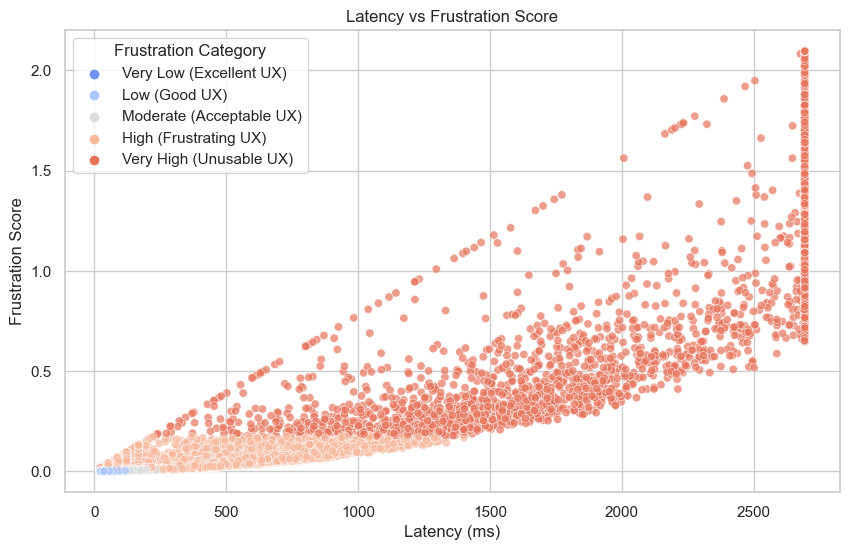

In [142]:
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df["latency (ms)"], y=df["frustration_score"], hue=df["frustration_category"], palette="coolwarm", alpha=0.7)

# Add labels and title
plt.title("Latency vs Frustration Score")
plt.xlabel("Latency (ms)")
plt.ylabel("Frustration Score")
plt.legend(title="Frustration Category")

# Show plot
plt.show()

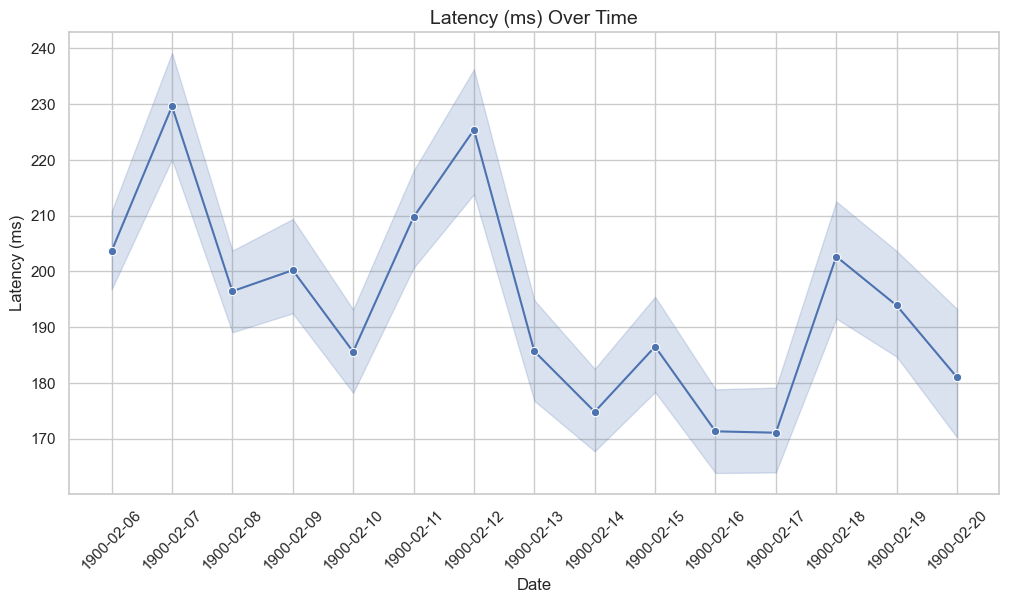

In [235]:
# Sort values by date for better visualization
df = df.sort_values(by='date')

# Set plot style
sns.set(style="whitegrid")

# Plot Latency Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['latency (ms)'], marker='o', color='b')

# Customize the plot
plt.title("Latency (ms) Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Latency (ms)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()

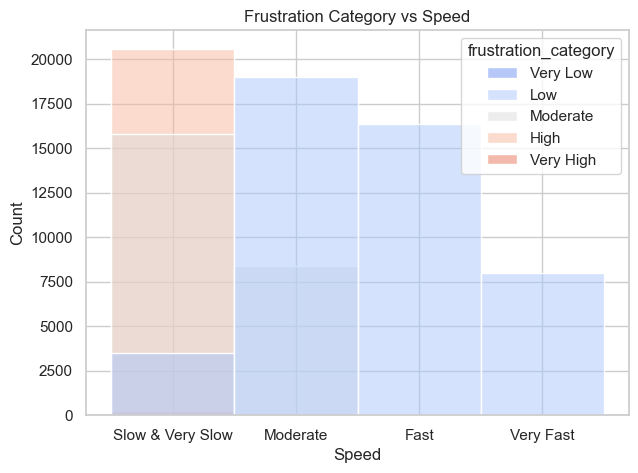

In [211]:
filtered_df = df[df['latency (ms)'] <= 1000]
plt.figure(figsize=(7, 5))
sns.histplot(data=filtered_df, x="speed_category", hue="frustration_category", palette="coolwarm")
plt.title("Frustration Category vs Speed")
plt.xlabel("Speed")
plt.ylabel("Count")
plt.show()

In [184]:
filtered_df = df[
    (df['frustration_category'].isin(["Very Low (Excellent UX)", "Low (Good UX)"])) & 
    (df['speed_category'].isin(["Slow & Very Slow"]))
]

# Display the results
print(filtered_df)

      user_country    location_selected protocol        date  \
14              FR  Germany - Nuremberg      udp  1900-02-06   
111             DE  Germany - Nuremberg      udp  1900-02-06   
117             FR  Germany - Nuremberg      udp  1900-02-06   
147             DE  Germany - Nuremberg      udp  1900-02-06   
169             DE  Germany - Nuremberg      udp  1900-02-06   
...            ...                  ...      ...         ...   
99573           DE  Germany - Nuremberg      udp  1900-02-17   
99651           DE  Germany - Nuremberg      udp  1900-02-17   
99652           DE  Germany - Nuremberg      udp  1900-02-17   
99947           FR  Germany - Nuremberg      udp  1900-02-17   
99975           FR   France - Paris - 1      udp  1900-02-17   

       time_to_connect (ms)  download_speed (kbps)  latency (ms)  \
14                       13                15880.0            36   
111                      40                24510.0            59   
117                      13

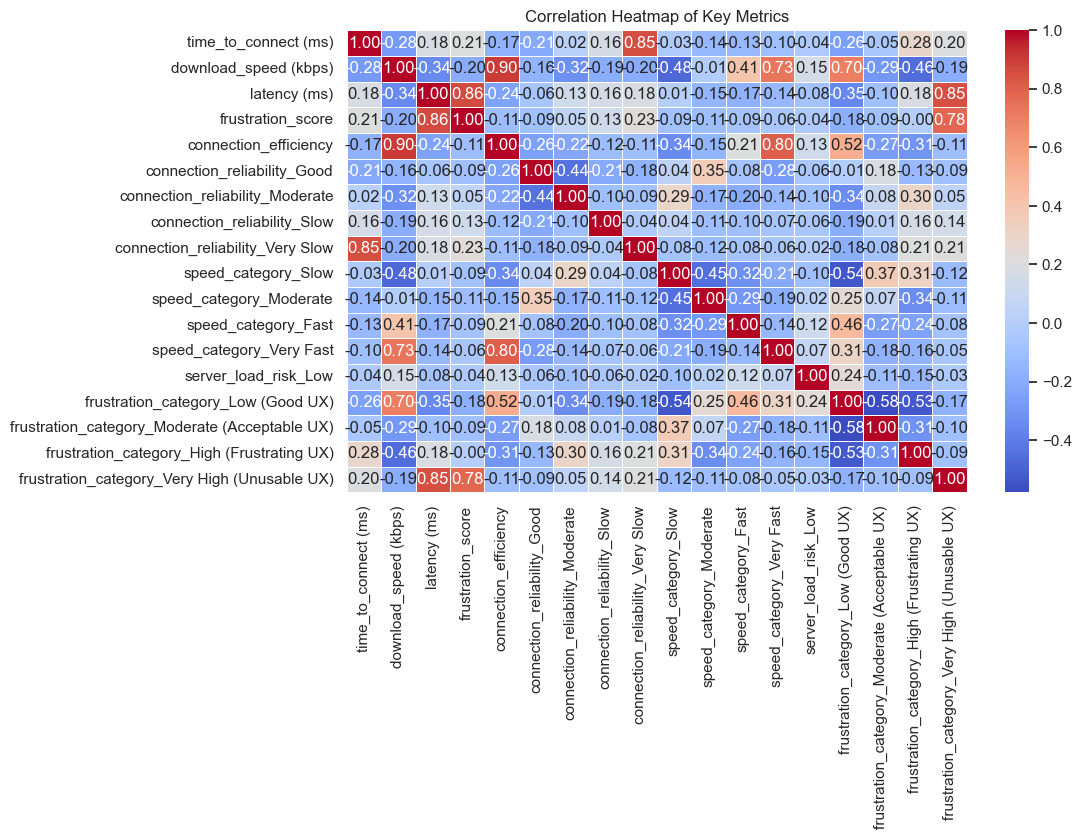

In [129]:
# Encode categorical variables for correlation analysis
encoded_df = df.copy()
categorical_columns = ['connection_reliability', 'speed_category', 'server_load_risk', 'frustration_category']
encoded_df = pd.get_dummies(encoded_df, columns=categorical_columns, drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()